# Влияние $\epsilon$

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

sys.path.append('/home/tpopova/prj/PB_SCF/08_2D_pore/py_files')
sys.path.append('/home/tpopova/prj/PB_SCF/01_dendrone_pore/py_files')

import config_loader
from out_reader import out_reader, get_profiles_by_y_or_x
from dendrons_pore import dendrons_pore

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml


Параметры

In [2]:
N = 20
S = 100
D = 20
valence = -0.5

# Для 2D
L_pore = 40
space = 10
L_wall = 30

Cs = 0.005
chi_solv = 0.5
chi_surf = 0

eps_membrane = [5, 30, 80, 90]

In [3]:
N, n, theta, H_dendrons, r_in_dendrons, r_out_dendrons, psi_in_dendrons, psi_out_dendrons, c_pol_dendrons, _ = dendrons_pore(
    Cs = Cs,
    
    #параметры щетки
    alpha = abs(valence),
    S = S,
    
    #параметры поры
    D = D,
    N_opt = N,
    
)

print(N, H_dendrons)

20 [6.30660332]


In [4]:
df_dict = {}

# Цикл по каждому значению epsilon_surf
for eps in eps_membrane:
    # Загрузка конфигурации
    config = config_loader.load_config()

    # Обновление параметров конфигурации для текущего epsilon_surf
    params_to_update = {
        "Cs": Cs,
        "D": D,
        "L_pore": L_pore,
        "L_wall": L_wall,
        "N": N,
        "S": S,
        "chi_solv": chi_solv,
        "chi_surf": chi_surf,
        "max_val": 0.1,
        "min_val": 0.1,
        "output_dir": f"2D_pore_in_files_eps",  # Уникальная папка для каждого epsilon
        "range_param": 'Cs',
        "space": space,
        "target_dir": "/home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates",
        "valence": valence,
        "epsilon_surf": eps  # Устанавливаем текущее значение epsilon
    }

    # Обновляем конфигурацию
    for param, value in params_to_update.items():
        config = config_loader.update_config_param(config, param, value)

    # Сохраняем обновленную конфигурацию
    config_loader.save_config(config)

    # Получение данных
    df, x, y, psi, phi_brush, phi_end_brush = out_reader()

    # Сохраняем df в словарь по значению epsilon_surf
    df_dict[eps] = df

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Обновление параметра Cs на 0.005
INFO:root:Обновление параметра D на 20
INFO:root:Обновление параметра L_pore на 40
INFO:root:Обновление параметра L_wall на 30
INFO:root:Обновление параметра N на 20
INFO:root:Обновление параметра S на 100
INFO:root:Обновление параметра chi_solv на 0.5
INFO:root:Обновление параметра chi_surf на 0
INFO:root:Обновление параметра max_val на 0.1
INFO:root:Обновление параметра min_val на 0.1
INFO:root:Обновление параметра output_dir на 2D_pore_in_files_eps
INFO:root:Обновление параметра range_param на Cs
INFO:root:Обновление параметра space на 10
INFO:root:Обновление параметра target_dir на /home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates
INFO:root:Обновление параметра valence на -0.5
INFO:root:Обновление параметра epsilon_surf на 5
INFO:root:Конфигурация успешно сохранена в /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Конфигу

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
DIIS has been notified
Your guess = 1.482152e+00 
iterations = 1 g = 1.331755e+00 
iterations = 2 g = 1.207615e+00 
iterations = 3 g = 8.284260e-01 
iterations = 4 g = 6.227479e-01 
iterations = 5 g = 6.005642e-01 
iterations = 6 g = 5.784537e-01 
iterations = 7 g = 5.739607e-01 
iterations = 8 g = 5.072445e-01 
iterations = 9 g = 4.911525e-01 
iterations = 10 g = 4.546468e-01 
iterations = 11 g = 4.142318e-01 
iterations = 12 g = 3.657661e-01 
iterations = 13 g = 3.277295e-01 
iterations = 14 g = 3.130898e-01 
iterations = 15 g = 2.923587e-01 
iterations = 16 g = 2.756410e-01 
iterations = 17 g = 2.349091e-01 
iterations = 18 g = 2.306879e-01 
iterations = 19 g = 2.135933e-01 
iterations = 20 g = 2.015603e-01 
iterations = 21 g = 1.996948e-01 
iterations = 22 g = 1.

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Обновление параметра Cs на 0.005
INFO:root:Обновление параметра D на 20
INFO:root:Обновление параметра L_pore на 40
INFO:root:Обновление параметра L_wall на 30
INFO:root:Обновление параметра N на 20
INFO:root:Обновление параметра S на 100
INFO:root:Обновление параметра chi_solv на 0.5
INFO:root:Обновление параметра chi_surf на 0
INFO:root:Обновление параметра max_val на 0.1
INFO:root:Обновление параметра min_val на 0.1
INFO:root:Обновление параметра output_dir на 2D_pore_in_files_eps
INFO:root:Обновление параметра range_param на Cs
INFO:root:Обновление параметра space на 10
INFO:root:Обновление параметра target_dir на /home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates
INFO:root:Обновление параметра valence на -0.5
INFO:root:Обновление параметра epsilon_surf на 30
INFO:root:Конфигурация успешно сохранена в /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Конфиг

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
DIIS has been notified
Your guess = 1.479138e+00 
iterations = 1 g = 1.328008e+00 
iterations = 2 g = 1.202725e+00 
iterations = 3 g = 8.066869e-01 
iterations = 4 g = 5.606271e-01 
iterations = 5 g = 5.302390e-01 
iterations = 6 g = 4.944747e-01 
iterations = 7 g = 4.897856e-01 
iterations = 8 g = 4.268946e-01 
iterations = 9 g = 4.164601e-01 
iterations = 10 g = 3.897770e-01 
iterations = 11 g = 3.688662e-01 
iterations = 12 g = 3.168650e-01 
iterations = 13 g = 2.851079e-01 
iterations = 14 g = 2.693216e-01 
iterations = 15 g = 2.558510e-01 
iterations = 16 g = 2.368060e-01 
iterations = 17 g = 2.046636e-01 
iterations = 18 g = 2.001174e-01 
iterations = 19 g = 1.904544e-01 
iterations = 20 g = 1.862411e-01 
iterations = 21 g = 1.648508e-01 
iterations = 22 g = 1.

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Обновление параметра Cs на 0.005
INFO:root:Обновление параметра D на 20
INFO:root:Обновление параметра L_pore на 40
INFO:root:Обновление параметра L_wall на 30
INFO:root:Обновление параметра N на 20
INFO:root:Обновление параметра S на 100
INFO:root:Обновление параметра chi_solv на 0.5
INFO:root:Обновление параметра chi_surf на 0
INFO:root:Обновление параметра max_val на 0.1
INFO:root:Обновление параметра min_val на 0.1
INFO:root:Обновление параметра output_dir на 2D_pore_in_files_eps
INFO:root:Обновление параметра range_param на Cs
INFO:root:Обновление параметра space на 10
INFO:root:Обновление параметра target_dir на /home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates
INFO:root:Обновление параметра valence на -0.5
INFO:root:Обновление параметра epsilon_surf на 80
INFO:root:Конфигурация успешно сохранена в /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Конфиг

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
DIIS has been notified
Your guess = 1.474147e+00 
iterations = 1 g = 1.322065e+00 
iterations = 2 g = 1.195674e+00 
iterations = 3 g = 7.895267e-01 
iterations = 4 g = 5.187247e-01 
iterations = 5 g = 4.827168e-01 
iterations = 6 g = 4.338176e-01 
iterations = 7 g = 4.289107e-01 
iterations = 8 g = 3.532829e-01 
iterations = 9 g = 3.456216e-01 
iterations = 10 g = 3.115182e-01 
iterations = 11 g = 3.268698e-01 
iterations = 12 g = 2.594120e-01 
iterations = 13 g = 2.300454e-01 
iterations = 14 g = 2.193917e-01 
iterations = 15 g = 2.070892e-01 
iterations = 16 g = 1.919367e-01 
iterations = 17 g = 1.756059e-01 
iterations = 18 g = 1.631672e-01 
iterations = 19 g = 1.576339e-01 
iterations = 20 g = 1.534367e-01 
iterations = 21 g = 1.487847e-01 
iterations = 22 g = 1.

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Обновление параметра Cs на 0.005
INFO:root:Обновление параметра D на 20
INFO:root:Обновление параметра L_pore на 40
INFO:root:Обновление параметра L_wall на 30
INFO:root:Обновление параметра N на 20
INFO:root:Обновление параметра S на 100
INFO:root:Обновление параметра chi_solv на 0.5
INFO:root:Обновление параметра chi_surf на 0
INFO:root:Обновление параметра max_val на 0.1
INFO:root:Обновление параметра min_val на 0.1
INFO:root:Обновление параметра output_dir на 2D_pore_in_files_eps
INFO:root:Обновление параметра range_param на Cs
INFO:root:Обновление параметра space на 10
INFO:root:Обновление параметра target_dir на /home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates
INFO:root:Обновление параметра valence на -0.5
INFO:root:Обновление параметра epsilon_surf на 90
INFO:root:Конфигурация успешно сохранена в /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Конфиг

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
DIIS has been notified
Your guess = 1.473286e+00 
iterations = 1 g = 1.321048e+00 
iterations = 2 g = 1.194482e+00 
iterations = 3 g = 7.869218e-01 
iterations = 4 g = 5.131363e-01 
iterations = 5 g = 4.764758e-01 
iterations = 6 g = 4.263349e-01 
iterations = 7 g = 4.214890e-01 
iterations = 8 g = 3.441227e-01 
iterations = 9 g = 3.372654e-01 
iterations = 10 g = 3.013191e-01 
iterations = 11 g = 3.213339e-01 
iterations = 12 g = 2.511847e-01 
iterations = 13 g = 2.219252e-01 
iterations = 14 g = 2.121947e-01 
iterations = 15 g = 1.994910e-01 
iterations = 16 g = 1.854991e-01 
iterations = 17 g = 1.696354e-01 
iterations = 18 g = 1.577658e-01 
iterations = 19 g = 1.514797e-01 
iterations = 20 g = 1.457442e-01 
iterations = 21 g = 1.430493e-01 
iterations = 22 g = 1.

# График потенциала

<>:25: SyntaxWarning: invalid escape sequence '\ '
<>:25: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_22853/2720550306.py:25: SyntaxWarning: invalid escape sequence '\ '
  plt.title("$Профили \ \\psi \ vs \ x \ для \ различных \ \\epsilon_{surf}$")


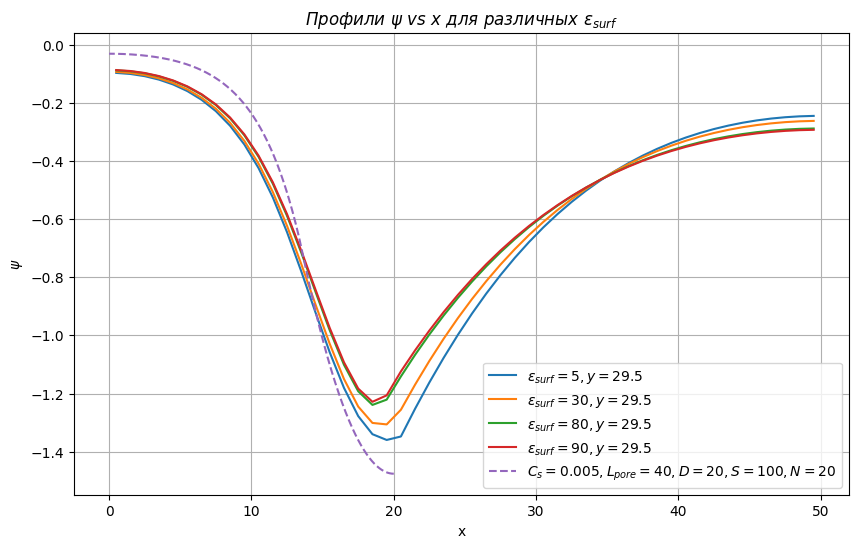

In [5]:
#  Доли от центра для y (например, центральная ось)
y_fraction = [0]  # 0 означает долю 0% от начала (центральная линия)

# Создаем график
plt.figure(figsize=(10, 6))

# Цикл по каждому значению epsilon_surf
for eps, psi_data in df_dict.items():

    # Получение профилей для выбранных y
    psi_nam = get_profiles_by_y_or_x(
        psi_data, y_fraction, profiles_name='sys_noname_psi', groupby='y', coord='x', use_fraction=True
    )

    # Построение графиков для psi
    for y_val, data in psi_nam.items():
        plt.plot(
            data['x'], data['sys_noname_psi'],
            label=f"$\\epsilon_{{surf}} = {eps}, y = {y_val}$"
        )
plt.plot(np.hstack((r_in_dendrons, r_out_dendrons)), np.hstack((psi_in_dendrons, psi_out_dendrons)), linestyle = '--', label = f'$C_s = {Cs}, L_{{pore}} = {L_pore}, D = {D}, S = {S}, N = {N}$')
# Настройки графика
plt.xlabel("x")
plt.ylabel("$\\psi$")
plt.title("$Профили \ \\psi \ vs \ x \ для \ различных \ \\epsilon_{surf}$")
plt.legend()
plt.grid(True)
plt.show()

# График плотности полимера

<>:25: SyntaxWarning: invalid escape sequence '\ '
<>:25: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_22853/2590211333.py:25: SyntaxWarning: invalid escape sequence '\ '
  plt.title("$Профили \ \\phi \ vs \ x \ для \ различных \ \\epsilon_{surf}$")


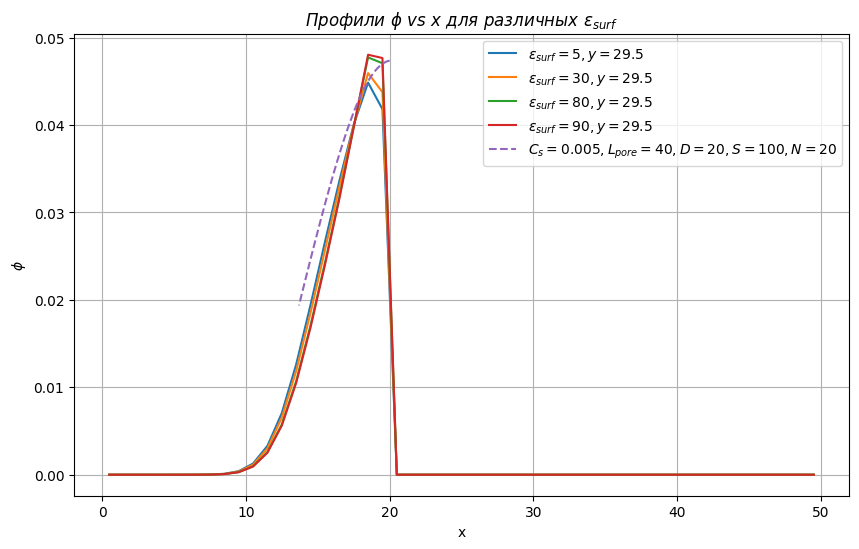

In [6]:
#  Доли от центра для y (например, центральная ось)
y_fraction = [0]  # 0 означает долю 0% от начала (центральная линия)

# Создаем график
plt.figure(figsize=(10, 6))

# Цикл по каждому значению epsilon_surf
for eps, phi_data in df_dict.items():

    # Получение профилей для выбранных y
    phi_nam = get_profiles_by_y_or_x(
        phi_data, y_fraction, profiles_name='combined_phi', groupby='y', coord='x', use_fraction=True
    )

    # Построение графиков для psi
    for y_val, data in phi_nam.items():
        plt.plot(
            data['x'], data['combined_phi'],
            label=f"$\\epsilon_{{surf}} = {eps}, y = {y_val}$"
        )
plt.plot(r_in_dendrons, c_pol_dendrons, linestyle = '--', label = f'$C_s = {Cs}, L_{{pore}} = {L_pore}, D = {D}, S = {S}, N = {N}$')
# Настройки графика
plt.xlabel("x")
plt.ylabel("$\\phi$")
plt.title("$Профили \ \\phi \ vs \ x \ для \ различных \ \\epsilon_{surf}$")
plt.legend()
plt.grid(True)
plt.show()